# Demo: Multi-Class Classification
We're using the IRIS dataset, a classic machine learning dataset that illustrates both linearly separable and non-linearly separable classes.

3 different types of irises’ (Setosa, Versicolour, and Virginica). There are 4 features in the dataset: sepal length, sepal width, petal length, petal width.

This dataset is so famous it even has a [Wikepdia page](https://en.wikipedia.org/wiki/Iris_flower_data_set).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/440px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" width=200 />
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/440px-Iris_versicolor_3.jpg" width=200 />
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/440px-Iris_virginica.jpg" width=200 />

In [31]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets


# Loading the dataset
iris = datasets.load_iris()
X = iris.data[:,:2] # using only first two features
y = iris.target

(num_samples, num_features) = X.shape
print("num_samples, num_features", X.shape)

num_samples, num_features (150, 2)


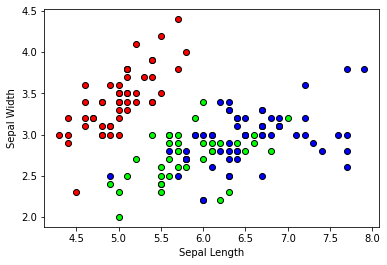

In [32]:
# y==0 picks the indicies corresponding to y equal zero
plt.rcParams['figure.figsize'] = [6, 4]
plt.plot(X[y==0,0], X[y==0,1], 'o', markerfacecolor=(1,0,0,1), markeredgecolor='black')
plt.plot(X[y==1,0], X[y==1,1], 'o', markerfacecolor=(0,1,0,1), markeredgecolor='black')
plt.plot(X[y==2,0], X[y==2,1], 'o', markerfacecolor=(0,0,1,1), markeredgecolor='black');

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width');

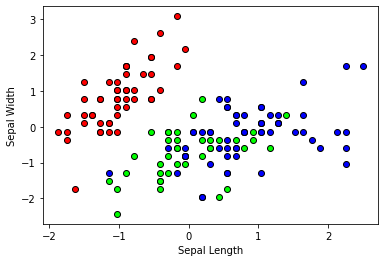

In [33]:
from sklearn import preprocessing

# normalizing the data
Xs = preprocessing.scale(X)

# Plot it again and compare it with the data before normalization
plt.rcParams['figure.figsize'] = [6, 4]
plt.plot(Xs[y==0,0], Xs[y==0,1], 'o', markerfacecolor=(1,0,0,1), markeredgecolor='black')
plt.plot(Xs[y==1,0], Xs[y==1,1], 'o', markerfacecolor=(0,1,0,1), markeredgecolor='black')
plt.plot(Xs[y==2,0], Xs[y==2,1], 'o', markerfacecolor=(0,0,1,1), markeredgecolor='black');

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width');

#### Split data into train and test dataset
Import model_selection from sklearn.

Use the `sklearn.model_selection` module to split your data.

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.33, random_state=42)

#### Fit a Logistic Model

Import linear_model from sklearn.

Use the `sklearn.linear_model` module to create a `LogisticRegression`.

Fit the model with training dataset.

In [35]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
yhat = logreg.predict(X_test)

In [36]:
yhat_test = logreg.predict(X_test)
yhat_train = logreg.predict(X_train)

acc_test = np.sum((yhat_test - y_test == 0))/y_test.shape[0]
acc_train = np.sum((yhat_train - y_train == 0))/y_train.shape[0]

print ("Training acc.", acc_train)
print ("Test acc.", acc_test)

Training acc. 0.79
Test acc. 0.82


Find the training and test accuracy of the model.

## Decision Boundary
[Code for plotting decission boundary](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html)

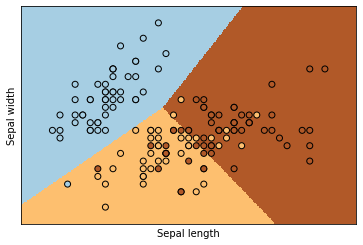

In [37]:
### CODE FROM SKLEARN IRIS DEMO ###

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = Xs[:, 0].min() - .5, Xs[:, 0].max() + .5
y_min, y_max = Xs[:, 1].min() - .5, Xs[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# xx has shape (327, 269)
# xx.ravel() has shape (87963, )
# np.c_[xx.ravel(), yy.ravel()] has shape (87963, 2)
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(Xs[:, 0], Xs[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# Limit the region of plotting
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## Understanding The Classifications

### Class confidence outputs
In our print statement, the first column is our decision, cols 2-4 are our class proability outputs.

In [38]:
# showing the probabilities
yhat_probs = logreg.predict_proba(X_test)

np.set_printoptions(precision=2, suppress=True)

print(yhat.shape, yhat_probs.shape)
# [class, prob_of_class_1, prob_of_class_2, prob_of_class_3]
print(np.hstack([yhat.reshape(-1,1), yhat_probs]))

(50,) (50, 3)
[[1.   0.01 0.54 0.45]
 [0.   0.86 0.05 0.09]
 [2.   0.   0.16 0.84]
 [1.   0.03 0.53 0.44]
 [2.   0.   0.32 0.68]
 [0.   0.78 0.13 0.09]
 [1.   0.13 0.59 0.28]
 [2.   0.   0.22 0.78]
 [1.   0.   0.7  0.3 ]
 [1.   0.02 0.66 0.32]
 [2.   0.01 0.29 0.69]
 [0.   0.84 0.14 0.03]
 [0.   0.78 0.11 0.1 ]
 [0.   0.85 0.12 0.03]
 [0.   0.99 0.01 0.01]
 [2.   0.05 0.31 0.64]
 [2.   0.01 0.35 0.64]
 [1.   0.02 0.76 0.22]
 [1.   0.06 0.64 0.31]
 [2.   0.   0.45 0.55]
 [0.   0.95 0.04 0.01]
 [2.   0.03 0.47 0.5 ]
 [0.   0.94 0.04 0.02]
 [2.   0.   0.45 0.55]
 [2.   0.   0.03 0.97]
 [2.   0.   0.3  0.7 ]
 [2.   0.   0.45 0.55]
 [2.   0.   0.22 0.78]
 [0.   0.84 0.14 0.03]
 [0.   0.89 0.09 0.02]
 [0.   1.   0.   0.  ]
 [0.   0.99 0.   0.01]
 [2.   0.   0.27 0.73]
 [0.   0.97 0.02 0.01]
 [0.   0.98 0.01 0.  ]
 [1.   0.   0.58 0.42]
 [2.   0.02 0.32 0.66]
 [0.   0.93 0.05 0.03]
 [0.   0.98 0.01 0.01]
 [0.   0.99 0.   0.  ]
 [1.   0.02 0.66 0.32]
 [2.   0.22 0.3  0.48]
 [2.   0.   0.27 0.7

## Attempt at polynomial feature engineering

In [39]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
Xpoly = poly.fit_transform(X)

print(Xpoly.shape)

X_train, X_test, y_train, y_test = train_test_split(Xpoly, y, test_size=0.33, random_state=42)

logreg = LogisticRegression(C=1e8, solver='lbfgs', multi_class='multinomial', max_iter=5000)
logreg.fit(X_train, y_train)

print(logreg.score(X_train, y_train))

yhat = logreg.predict(X_test)
acc = np.mean(yhat == y_test)
print("Accuracy on test data = %f" % acc)

(150, 10)
0.81
Accuracy on test data = 0.760000


## Onehot encoding function
This function is not! necessary for this demo. Only being kept on this notebook for future purposes.

Using the onehot functions in SKlearn and other libraries is **very annoying**.
We can make our own function that is much easier to understand.

In [40]:
def onehot_enc(y,num_classes):
    (N,K) = (y.shape[0], num_classes)
    I = np.eye(K)
    y_onehot = np.zeros((N,K))
    for i in range(N):
        y_onehot[i,:] = I[y[i],:]
    return y_onehot

y_onehot = onehot_enc(y, 3)

print(y_onehot)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.